## Część I

### Zadanie 1

##### 1. Wczytaj dane i przygotuj je do analizy. Zadbaj o odpowiednie typy zmiennych, zweryfikuj czy przyjmują wartości zgodne z powyższym opisem, zbadaj czy nie występują braki w danych.

In [58]:
import chardet

with open("D:/Na uczelnię semestr 6/Analiza danych ankietowych/ankieta.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [59]:
import pandas as pd

data = pd.read_csv("D:/Na uczelnię semestr 6/Analiza danych ankietowych/ankieta.csv", encoding='ISO-8859-1', sep=";")
df = pd.DataFrame(data)

Czy są braki

In [60]:
czy_sa_braki = data.isna().any().any()
print(czy_sa_braki)

False


Za pomocą funkcji isna() sprawdzane jest czy wśród danych występują braki. Funkcja zwraca 'False', więc nie należy się spodziewać braków.

Zmiana nazwy kolumn

In [61]:
data.columns = ['DZIAŁ', 'STAŻ', 'CZY_KIER', 'PYT_1', 'PYT_2', 'PYT_3', 'PŁEĆ', 'WIEK']

Sprawdzenie typów 

In [64]:
print(df.dtypes)

DZIAŁ       object
STAŻ         int64
CZY_KIER    object
PYT_1        int64
PYT_2        int64
PYT_3        int64
PŁEĆ        object
WIEK         int64
dtype: object


Sprawdzenie typów danych wykazało, że zmienne STAŻ, PYT_1, PYT_2, PYT_3 i WIEK są typu int64, co oznacza, że są to liczby całkowite, co zgadza się z ich 

In [62]:
# Wyświetl liczbę wystąpień każdej wartości w kolumnach
for kolumna in df.columns:
    print(f"Liczba wystąpień wartości w kolumnie '{kolumna}':")
    print(df[kolumna].value_counts())
    print() 

Liczba wystąpień wartości w kolumnie 'DZIAŁ':
PD    98
MK    45
HR    31
IT    26
Name: DZIAŁ, dtype: int64

Liczba wystąpień wartości w kolumnie 'STAŻ':
2    140
1     41
3     19
Name: STAŻ, dtype: int64

Liczba wystąpień wartości w kolumnie 'CZY_KIER':
Nie    173
Tak     27
Name: CZY_KIER, dtype: int64

Liczba wystąpień wartości w kolumnie 'PYT_1':
 1    100
 0     40
 2     29
-1     17
-2     14
Name: PYT_1, dtype: int64

Liczba wystąpień wartości w kolumnie 'PYT_2':
 2    104
-2     74
-1     20
 1      2
Name: PYT_2, dtype: int64

Liczba wystąpień wartości w kolumnie 'PYT_3':
 2    86
-2    52
 1    32
-1    30
Name: PYT_3, dtype: int64

Liczba wystąpień wartości w kolumnie 'PŁEĆ':
M    129
K     71
Name: PŁEĆ, dtype: int64

Liczba wystąpień wartości w kolumnie 'WIEK':
40    16
36    13
39    11
44    11
42    10
45    10
37     9
38     9
43     8
53     7
48     7
41     7
49     6
54     5
52     5
50     5
64     5
28     4
46     4
65     4
33     4
30     4
47     3
58    

##### 2. Utwórz zmienną WIEK_KAT przeprowadzając kategoryzację zmiennej WIEK korzystając z następujących przedziałów: do 35 lat, między 36 a 45 lat, między 46 a 55 lat, powyżej 55 lat.

In [68]:
df['WIEK_KAT'] = pd.cut(df['WIEK'], 
                         bins=[0, 35, 45, 55, float('inf')], 
                         labels=['do 35 lat', '36-45 lat', '46-55 lat', 'powyżej 55 lat'],
                         right=True)  # Domknięcie przedziałów z prawej strony

In [69]:
for kolumna in ['WIEK_KAT']:
    print(f"Liczba wystąpień wartości w kolumnie '{kolumna}':")
    print(df[kolumna].value_counts())
    print()

Liczba wystąpień wartości w kolumnie 'WIEK_KAT':
36-45 lat         104
46-55 lat          45
do 35 lat          26
powyżej 55 lat     25
Name: WIEK_KAT, dtype: int64



##### 3. Sporządź tablice licznosci dla zmiennych: DZIAŁ, STAŻ, CZY_KIER, PŁEĆ , WIEK_KAT. Sformułuj wnioski.

In [70]:
for kolumna in df.drop(columns=['WIEK', 'PYT_1', 'PYT_2', 'PYT_3']).columns:
    print(f"Liczba wystąpień wartości w kolumnie '{kolumna}':")
    print(df[kolumna].value_counts())
    print()  

Liczba wystąpień wartości w kolumnie 'DZIAŁ':
PD    98
MK    45
HR    31
IT    26
Name: DZIAŁ, dtype: int64

Liczba wystąpień wartości w kolumnie 'STAŻ':
2    140
1     41
3     19
Name: STAŻ, dtype: int64

Liczba wystąpień wartości w kolumnie 'CZY_KIER':
Nie    173
Tak     27
Name: CZY_KIER, dtype: int64

Liczba wystąpień wartości w kolumnie 'PŁEĆ':
M    129
K     71
Name: PŁEĆ, dtype: int64

Liczba wystąpień wartości w kolumnie 'WIEK_KAT':
36-45 lat         104
46-55 lat          45
do 35 lat          26
powyżej 55 lat     25
Name: WIEK_KAT, dtype: int64



- Analiza zmiennej **`DZIAŁ`** wykazała, że:
  - najwięcej pracowników, czyli 98, zatrudnionych jest w dziale produktowym (PD),
  - w dziale marketingu pracuje 45 osób,
  - w dziale HR – 31 osób,
  - najmniej liczny jest dział IT – 26 pracowników.

Z powyższych informacji można wywnioskować, że firma w dużej mierze opiera swoje działanie na pewnych produktach, ponieważ największa ilość osób odpowiada za nie, a druga największa grupa pracowników zajmuje się ich marketingiem. Działy IT i HR pełnią poboczną rolę w tej firmie.

- Analiza zmiennej **`STAŻ`** (długość zatrudnienia) pokazuje, że:
  - 140 osób pracuje w firmie od ponad roku do trzech lat,
  - 41 osoby mają staż krótszy niż rok,
  - 19 osób pracuje w firmie ponad trzy lata.

Powyższa analiza pokazuje, że niewielka część osób może pochwalić się stażem pracy dłuższym niż trzy lata, znaczna większość pracowników jest w firmie od roku do trzech lat, a reszta jeszcze mniej, co może świadczyć o tym, że firma jest stosunkowo nowa na rynku lub dwa lata temu przeszła duży rozwój.

- Analiza **`CZY_KIER`**:
  - 173 osoby nie pełnią kierwoniczych funkcji,
  - 27 jest kierwonikami.

Dane jasno wskazują, że stanowisk kierowniczych jest niewiele w porównaniu z resztą, co jest spodziewane w firmach.

- Analiza **`PŁEĆ`**:
  - 129 pracowników to mężczyźni,
  - 71 to kobiety.

Analiza płci pracowników wykazuje znaczną przewagę mężczyzn w firmie.

- Analiza **`WIEK_KAT`**:
  - 104 osoby są w wieku 36-45 lat,
  - 45 osoby są w wieku 46-55 lat,
  - 26 osób ma do 35 lat,
  - 25 ma powyżej 55 lat.

Widać, że firma stawia na pracowników w średnim wieku, ponieważ jest ich aż 149, natomiast ludzi do 35 lat jest porównywalna ilość, co tych powyżej 55 roku życia.

##### 4. Sporządź wykresy kołowe oraz wykresy słupkowe dla zmiennych: PYT_1 oraz PYT_2. Sformułuj wnioski.

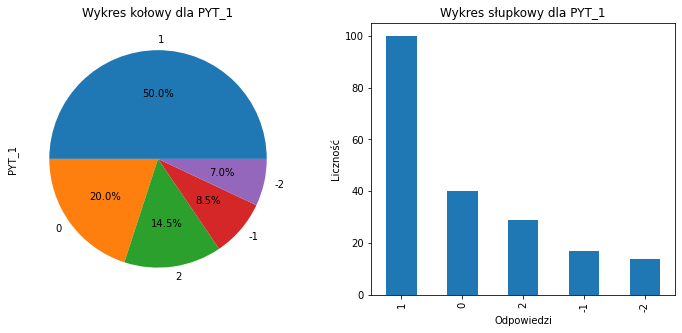

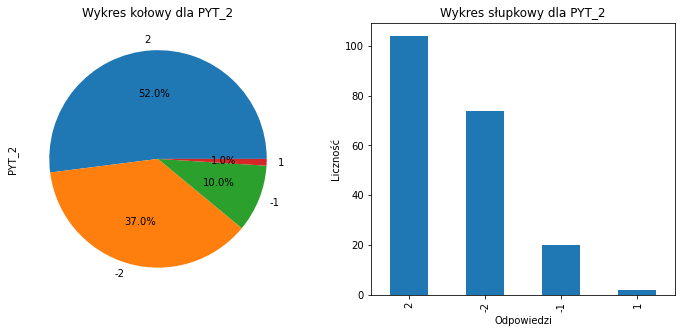

In [13]:
import matplotlib.pyplot as plt

def generuj_wykresy(df, kolumna):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Wykres kołowy
    df[kolumna].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
    ax[0].set_title(f'Wykres kołowy dla {kolumna}')

    # Wykres słupkowy
    df[kolumna].value_counts().plot.bar(ax=ax[1])
    ax[1].set_title(f'Wykres słupkowy dla {kolumna}')
    ax[1].set_xlabel('Odpowiedzi')
    ax[1].set_ylabel('Liczność')

    plt.show()

# Generowanie wykresów dla PYT_1 i PYT_2
generuj_wykresy(df, 'PYT_1')
generuj_wykresy(df, 'PYT_2')


Wnioski:

##### 5. Sporządź tablice wielodzielcze dla par zmiennych: PYT_1 i DZIAŁ, PYT_1 i STAŻ ,PYT_1 i CZY_KIER, PYT_1 i PŁEĆ oraz PYT_1 i WIEK_KAT. Sformułuj wnioski.

In [15]:
# Tworzenie tabel wielodzielczych dla par zmiennych
tablice_wielodzielcze = {
    'PYT_1 vs DZIAŁ': pd.crosstab(df['PYT_1'], df['DZIAŁ']),
    'PYT_1 vs STAŻ': pd.crosstab(df['PYT_1'], df['STAŻ']),
    'PYT_1 vs CZY_KIER': pd.crosstab(df['PYT_1'], df['CZY_KIER']),
    'PYT_1 vs PŁEĆ': pd.crosstab(df['PYT_1'], df['PŁEĆ']),
    'PYT_1 vs WIEK_KAT': pd.crosstab(df['PYT_1'], df['WIEK_KAT'])
}

def rys_tabl_wielod(tablice_wielodzielcze):
    for nazwa, tabela in tablice_wielodzielcze.items():
        print(f"\nTabela wielodzielcza: {nazwa}")
        print(tabela)
        print()  # Dodanie pustej linii dla czytelności
        
rys_tabl_wielod(tablice_wielodzielcze)


Tabela wielodzielcza: PYT_1 vs DZIAŁ
DZIAŁ  HR  IT  MK  PD
PYT_1                
-2      2   0   3   9
-1      2   2   3  10
 0      5   4  14  17
 1     19  15  15  51
 2      3   5  10  11


Tabela wielodzielcza: PYT_1 vs STAŻ
STAŻ    1   2  3
PYT_1           
-2      5   5  4
-1      6  10  1
 0      8  26  6
 1     19  75  6
 2      3  24  2


Tabela wielodzielcza: PYT_1 vs CZY_KIER
CZY_KIER  Nie  Tak
PYT_1             
-2         10    4
-1         14    3
 0         34    6
 1         88   12
 2         27    2


Tabela wielodzielcza: PYT_1 vs PŁEĆ
PŁEĆ    K   M
PYT_1        
-2      3  11
-1      7  10
 0     14  26
 1     36  64
 2     11  18


Tabela wielodzielcza: PYT_1 vs WIEK_KAT
WIEK_KAT  do 35 lat  36-45 lat  46-55 lat  powyżej 55 lat
PYT_1                                                    
-2                1         11          2               0
-1                6          7          1               3
 0                3         24          5               8
 1      

### **Wnioski z analizy danych**

#### **Zależność PYT_1 od działu (DZIAŁ):**

- Najwięcej odpowiedzi pozytywnych (1 i 2) pochodziło z działu **PD** (łącznie 62 osoby).
- W pozostałych działach najczęściej wybierano wartość **1**:
  - **HR** – 19 osób („1”), 3 osoby („2”)
  - **IT** – 15 osób („1”), 5 osób („2”)
  - **MK** – 15 osób („1”), 10 osób („2”)

#### **Zależność PYT_1 od stażu pracy (STAŻ):**

- Osoby ze stażem **1–3 lata** najczęściej wybierały wartość **1** (75 razy).
- Krótszy (do 1 roku) i dłuższy (ponad 3 lata) staż wiązały się z mniejszą liczbą pozytywnych ocen.
- Im dłuższy staż, tym mniej skrajnych ocen („-2” i „2”).

#### **Zależność PYT_1 od funkcji kierowniczej (CZY_KIER):**

- Zarówno kierownicy, jak i osoby niepełniące funkcji kierowniczej najczęściej wskazywały wartość **1**.
- Kierownicy rzadziej udzielali odpowiedzi negatywnych (łącznie 7 razy), niż pracownicy szeregowi (łącznie 24 razy).

#### **Zależność PYT_1 od płci (PŁEĆ):**

- Kobiety i mężczyźni najczęściej zaznaczali odpowiedź **1**.
- Mężczyźni częściej wybierali wartości **0** i **2**.
- Kobiety nieco częściej wskazywały odpowiedzi ujemne.

#### **Zależność PYT_1 od wieku (WIEK_KAT):**

- Najwięcej pozytywnych ocen (1 i 2) pochodziło od osób w wieku **36–45 lat**.
- Osoby powyżej 55 roku życia częściej udzielały neutralnych (0) lub lekko negatywnych (-1) odpowiedzi.
- Młodsi respondenci (do 35 lat) rzadziej wskazywali odpowiedzi „2”, częściej „-1” lub „0”.



##### 6. Sporządź tablice wielodzielcze dla pary zmiennych: PYT_2 i PYT_3. Sformułuj wnioski.

In [72]:
tablica_wielodzielcza = {'PYT_2 vs PYT_3':pd.crosstab(df['PYT_2'], df['PYT_3'])}

rys_tabl_wielod(tablica_wielodzielcza)


Tabela wielodzielcza: PYT_2 vs PYT_3
PYT_3  -2  -1   1   2
PYT_2                
-2     49  16   5   4
-1      3   6  10   1
 1      0   0   2   0
 2      0   8  15  81



Wnioski:

##### 7. Utwórz zmienną CZY_ZADOW na podstawie zmiennej PYT_2 łącząc kategorie "niezgadzam się" i "zdecydowanie się nie zgadzam" oraz "zgadzam się" i "zdecydowanie się zgadzam".

In [17]:
mapowanie = {
    -2: "Nie zadowolony",
    -1: "Nie zadowolony",
     1: "Zadowolony",
     2: "Zadowolony"
}

# Tworzenie nowej kolumny CZY_ZADOW
df['CZY_ZADOW'] = df['PYT_2'].map(mapowanie)

# Sprawdzenie wyników
print(df['CZY_ZADOW'].value_counts())


Zadowolony        106
Nie zadowolony     94
Name: CZY_ZADOW, dtype: int64


##### 8. Sporządź wykresy mozaikowe odpowiadające parom zmiennych: CZY_ZADOW iDZIAŁ, CZY_ZADOW i STAZ˙ , CZY_ZADOW i CZY_KIER, CZY_ZADOW i PŁEć´ oraz CZY_ZADOW i WIEK_KAT. Czy na podstawie uzyskanch wykresów można postawić pewne hipotezy dotyczące realicji między powyższymi zmiennymi? Spróbuj sformułowac kilka takich hipotez. 

<Figure size 576x432 with 0 Axes>

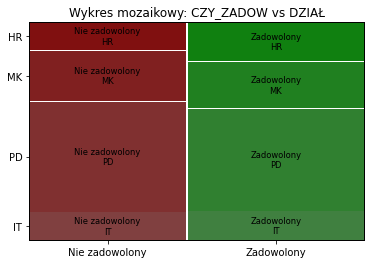

<Figure size 576x432 with 0 Axes>

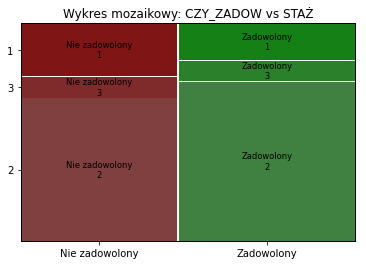

<Figure size 576x432 with 0 Axes>

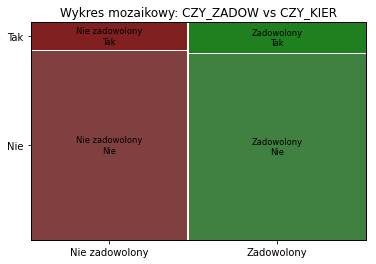

<Figure size 576x432 with 0 Axes>

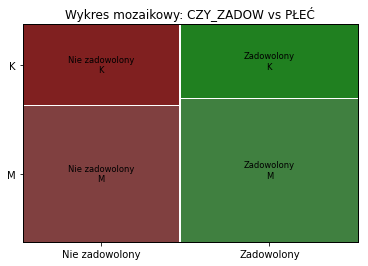

<Figure size 576x432 with 0 Axes>

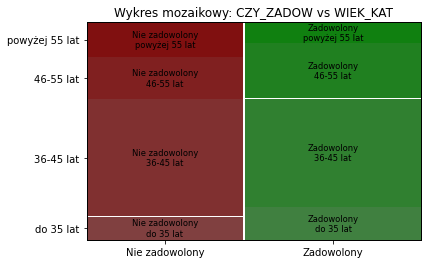

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Lista par zmiennych do wykresów mozaikowych
pary_zmiennych = [
    ('CZY_ZADOW', 'DZIAŁ'),
    ('CZY_ZADOW', 'STAŻ'),
    ('CZY_ZADOW', 'CZY_KIER'),
    ('CZY_ZADOW', 'PŁEĆ'),
    ('CZY_ZADOW', 'WIEK_KAT')
]

# Tworzenie wykresów mozaikowych
for zmienna1, zmienna2 in pary_zmiennych:
    plt.figure(figsize=(8, 6))
    mosaic(df, [zmienna1, zmienna2], title=f'Wykres mozaikowy: {zmienna1} vs {zmienna2}')
    plt.show()



Komentarz:

## Część II

### Zadanie 2

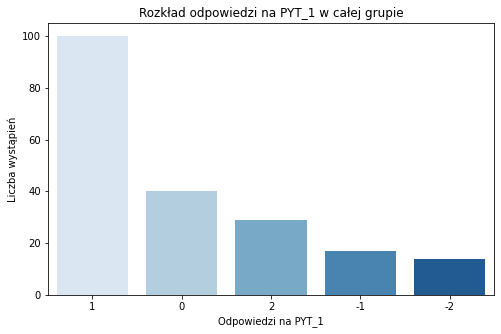

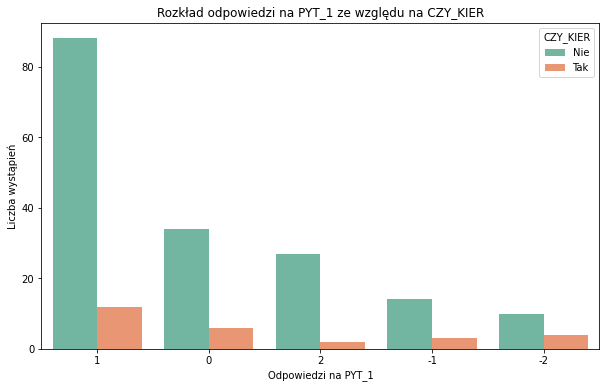

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sprawdzenie liczności odpowiedzi dla całej grupy
plt.figure(figsize=(8, 5))
sns.countplot(x=df['PYT_1'], order=df['PYT_1'].value_counts().index, palette="Blues")
plt.title("Rozkład odpowiedzi na PYT_1 w całej grupie")
plt.xlabel("Odpowiedzi na PYT_1")
plt.ylabel("Liczba wystąpień")
plt.show()

# Wizualizacja odpowiedzi PYT_1 w podziale na CZY_KIER
plt.figure(figsize=(10, 6))
sns.countplot(x=df['PYT_1'], hue=df['CZY_KIER'], order=df['PYT_1'].value_counts().index, palette="Set2")
plt.title("Rozkład odpowiedzi na PYT_1 ze względu na CZY_KIER")
plt.xlabel("Odpowiedzi na PYT_1")
plt.ylabel("Liczba wystąpień")
plt.legend(title="CZY_KIER")
plt.show()


### Zadanie 3

In [20]:
import numpy as np

# Losowanie bez zwracania
np.random.choice(10, 5, replace=False)  # Losuje 5 unikalnych liczb z zakresu 0:9

array([9, 3, 6, 5, 2])

In [21]:
# Losowanie ze zwracaniem
np.random.choice(10, 5, replace=True)  # Losuje 5 liczb z zakresu 0:9, ze zwracaniem


array([1, 4, 2, 1, 5])

In [22]:
# Losowanie z wagami
np.random.choice(10, 5, replace=True, p=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.4, 0.1, 0.1, 0.1])

array([6, 6, 7, 3, 6])

In [23]:
# Losowanie próbki bez zwracania (10% rekordów)
próbka_bez_zwracania = data.iloc[np.random.choice(len(data), int(len(data) * 0.1), replace=False)]

# Losowanie próbki ze zwracaniem (10% rekordów)
próbka_ze_zwracaniem = data.iloc[np.random.choice(len(data), int(len(data) * 0.1), replace=True)]

In [24]:
próbka_bez_zwracania

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
149,MK,3,Tak,0,-2,-2,M,37,36-45 lat,Nie zadowolony
65,PD,2,Nie,1,-1,1,M,62,powyżej 55 lat,Nie zadowolony
76,PD,2,Nie,1,2,1,K,41,36-45 lat,Zadowolony
34,PD,1,Nie,-1,-2,-2,M,28,do 35 lat,Nie zadowolony
82,PD,1,Nie,1,-2,-1,M,52,46-55 lat,Nie zadowolony
188,HR,2,Nie,1,2,2,M,49,46-55 lat,Zadowolony
186,HR,2,Tak,2,2,2,M,48,46-55 lat,Zadowolony
194,HR,3,Tak,1,2,-1,M,26,do 35 lat,Zadowolony
83,PD,1,Nie,1,2,2,M,54,46-55 lat,Zadowolony
174,HR,2,Nie,1,2,2,M,43,36-45 lat,Zadowolony


In [25]:
próbka_ze_zwracaniem 

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
158,MK,2,Nie,0,-2,-2,M,64,powyżej 55 lat,Nie zadowolony
105,PD,2,Nie,1,2,2,K,36,36-45 lat,Zadowolony
68,PD,1,Nie,-1,-2,-1,M,25,do 35 lat,Nie zadowolony
112,PD,1,Tak,-1,-2,-1,M,37,36-45 lat,Nie zadowolony
18,IT,2,Nie,1,2,-1,K,34,do 35 lat,Zadowolony
30,PD,1,Nie,1,2,2,M,32,do 35 lat,Zadowolony
16,IT,2,Nie,0,-2,-2,K,45,36-45 lat,Nie zadowolony
33,PD,1,Nie,-1,-2,-2,M,25,do 35 lat,Nie zadowolony
154,MK,2,Nie,2,2,2,M,32,do 35 lat,Zadowolony
164,MK,2,Nie,1,2,2,M,50,46-55 lat,Zadowolony


### Zadanie 4

In [26]:
def dwumian(n,p,rozmiar_proby):
    l=[]
    for _ in range(rozmiar_proby):
        sukcesy = np.sum(np.random.rand(n) < p)
        l.append(sukcesy)
    return np.array(l)

n = 10  # Liczba prób
p = 0.4  # Prawdopodobieństwo sukcesu
rozmiar_proby = 1000  # Liczba realizacji
# Generowanie realizacji
realizacje = dwumian(n, p, rozmiar_proby)

# Wyświetlenie kilku pierwszych realizacji
print("Pierwsze 10 realizacji:", realizacje[:10])

Pierwsze 10 realizacji: [5 3 4 4 6 4 5 5 5 3]


In [27]:
# Teoretyczne wartości
teoretyczna_srednia = n * p
teoretyczna_wariancja = n * p * (1 - p)

# Empiryczne wartości
empiryczna_srednia = np.mean(realizacje)
empiryczna_wariancja = np.var(realizacje)

print(f"Teoretyczna średnia: {teoretyczna_srednia}")
print(f"Empiryczna średnia: {empiryczna_srednia}")
print(f"Teoretyczna wariancja: {teoretyczna_wariancja}")
print(f"Empiryczna wariancja: {empiryczna_wariancja}")

Teoretyczna średnia: 4.0
Empiryczna średnia: 4.011
Teoretyczna wariancja: 2.4
Empiryczna wariancja: 2.446879


### Zadanie 5

In [28]:
def generuj_wielomianowe_wlasne(n, p, rozmiar_proby):
    k = len(p)  # Liczba kategorii
    realizacje = np.zeros((rozmiar_proby, k), dtype=int)
    
    for i in range(rozmiar_proby):
        # Symulacja n prób wielokategorialnych
        wyniki = np.random.choice(k, size=n, p=p)
        # Zliczanie liczby sukcesów w każdej kategorii
        realizacje[i] = np.bincount(wyniki, minlength=k)
    
    return realizacje

n = 10  # Liczba prób
p = [0.2, 0.3, 0.5]  # Wektor prawdopodobieństw (suma musi być równa 1)
rozmiar_proby = 1000  # Liczba realizacji

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

samples = generuj_wielomianowe_wlasne(n, p, rozmiar_proby)
print(samples)

# Empiryczne średnie i wariancje
empirical_mean = np.mean(samples, axis=0)
empirical_var = np.var(samples, axis=0, ddof=1)

# Teoretyczne średnie i wariancje
theoretical_mean = n * np.array(p)
theoretical_var = n * np.array(p) * (1 - np.array(p))

# Prezentacja wyników
data = pd.DataFrame({
    'Kategoria': [f'k{i+1}' for i in range(len(p))],
    'Średnia teoretyczna': theoretical_mean,
    'Średnia empiryczna': empirical_mean,
    'Wariancja teoretyczna': theoretical_var,
    'Wariancja empiryczna': empirical_var
})

print(data)


[[3 4 3]
 [3 2 5]
 [1 3 6]
 ...
 [1 3 6]
 [2 2 6]
 [1 6 3]]
  Kategoria  Średnia teoretyczna  Średnia empiryczna  Wariancja teoretyczna  \
0        k1                  2.0               2.126                    1.6   
1        k2                  3.0               2.837                    2.1   
2        k3                  5.0               5.037                    2.5   

   Wariancja empiryczna  
0              1.767892  
1              2.038469  
2              2.442073  


## Część III oraz IV

### Zadanie 6

In [30]:
import scipy.stats as stats
import numpy as np

def clopper_pearson_ci(confidence, successes=None, trials=None, data=None):
    """
    Oblicza przedział ufności Cloppera-Pearsona dla prawdopodobieństwa sukcesu w schemacie dwumianowym.
    
    Argumenty:
        confidence (float): Poziom ufności (np. 0.95 dla 95%)
        successes (int, opcjonalnie): Liczba sukcesów
        trials (int, opcjonalnie): Liczba prób
        data (list lub array, opcjonalnie): Wektor danych (0 - porażka, 1 - sukces)
    
    Zwraca:
        (dolna granica, górna granica) przedziału ufności
    """
    if data is not None:
        successes = np.sum(data)
        trials = len(data)
    
    if successes is None or trials is None:
        raise ValueError("Musisz podać albo (successes, trials), albo wektor data.")
    
    alpha = 1 - confidence
    lower_bound = stats.beta.ppf(alpha / 2, successes, trials - successes + 1)
    upper_bound = stats.beta.ppf(1 - alpha / 2, successes + 1, trials - successes)
    
    return (lower_bound, upper_bound)


In [31]:
# Przykład 1: Podanie liczby sukcesów i prób
ci1 = clopper_pearson_ci(0.95, successes=20, trials=100)
print("Przedział ufności (Clopper-Pearson) dla 20 sukcesów na 100 prób:", ci1)

# Przykład 2: Podanie wektora danych
data = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]
ci2 = clopper_pearson_ci(0.95, data=data)
print("Przedział ufności (Clopper-Pearson) dla podanego wektora danych:", ci2)


Przedział ufności (Clopper-Pearson) dla 20 sukcesów na 100 prób: (0.1266555521019559, 0.2918426890886279)
Przedział ufności (Clopper-Pearson) dla podanego wektora danych: (0.3605425873074897, 0.8088099392746928)


### Zadanie 7

In [32]:
df['CZY_ZADW'] = df['PYT_2'].map(mapowanie) == "Zadowolony"
df['CZY_ZADW_2'] = df['PYT_3'].map(mapowanie) == "Zadowolony"

In [33]:
# Przedział ufności dla pierwszego okresu
ci_czy_zadw = clopper_pearson_ci(0.95, data=df['CZY_ZADW'].astype(int))
print("Przedział ufności dla CZY_ZADW:", ci_czy_zadw)

# Przedział ufności dla drugiego okresu
ci_czy_zadw_2 = clopper_pearson_ci(0.95, data=df['CZY_ZADW_2'].astype(int))
print("Przedział ufności dla CZY_ZADW_2:", ci_czy_zadw_2)

Przedział ufności dla CZY_ZADW: (0.45833050041147494, 0.6007670588028855)
Przedział ufności dla CZY_ZADW_2: (0.5184215852127789, 0.6588693543285322)


### Zadanie 8

In [34]:
import numpy as np

# Parametry: liczba prób (n), prawdopodobieństwo sukcesu (p), liczba symulacji (size)
n, p, size = 100, 0.3, 10
losowe_dane = np.random.binomial(n, p, size)
print("Wygenerowane wartości z rozkładu dwumianowego:", losowe_dane)


Wygenerowane wartości z rozkładu dwumianowego: [38 39 30 30 31 25 38 32 30 29]


In [35]:
from statsmodels.stats.proportion import proportion_confint

# Przykładowe dane
sukcesy = 30
proby = 100
alpha = 0.05  # Poziom istotności (1 - poziom ufności)

# Przedział ufności metodą Cloppera-Pearsona
ci = proportion_confint(sukcesy, proby, alpha=alpha, method='beta')
print("Przedział ufności (Clopper-Pearson):", ci)



Przedział ufności (Clopper-Pearson): (0.21240642048953667, 0.39981467617980415)


In [36]:
for sukcesy in [10, 30, 50, 70]:
    ci = clopper_pearson_ci(0.95, successes=sukcesy, trials=n)
    print(f"Sukcesy: {sukcesy}/{n}, Przedział ufności: {ci}")


Sukcesy: 10/100, Przedział ufności: (0.04900468922148595, 0.1762225977400227)
Sukcesy: 30/100, Przedział ufności: (0.21240642048953665, 0.39981467617980415)
Sukcesy: 50/100, Przedział ufności: (0.39832112950330106, 0.6016788704966989)
Sukcesy: 70/100, Przedział ufności: (0.6001853238201958, 0.7875935795104634)


In [37]:
ci_wilson = proportion_confint(sukcesy, proby, alpha=alpha, method='wilson')
print("Przedział ufności (Wilson):", ci_wilson)


Przedział ufności (Wilson): (0.6041514536665332, 0.7810511470506724)


### Zadanie 9

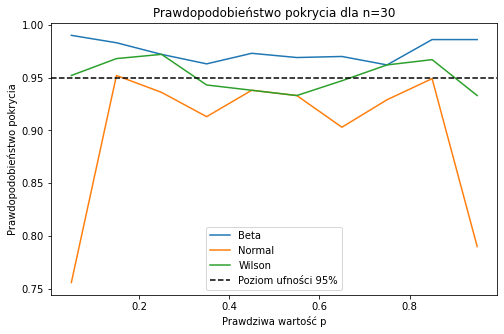

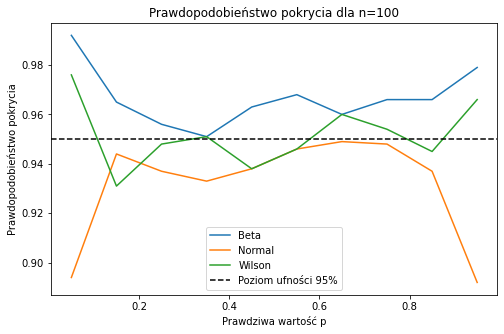

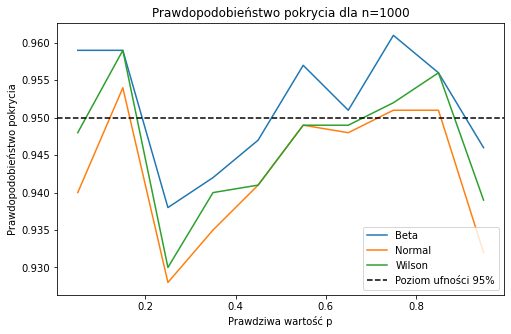

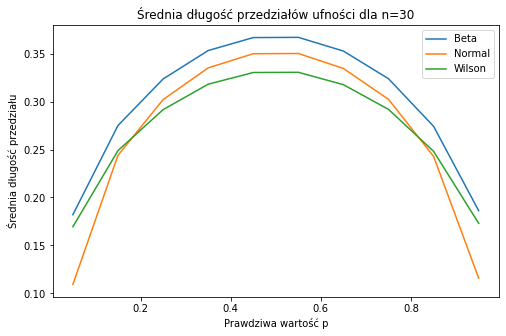

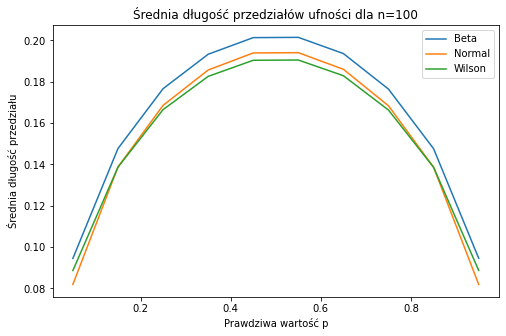

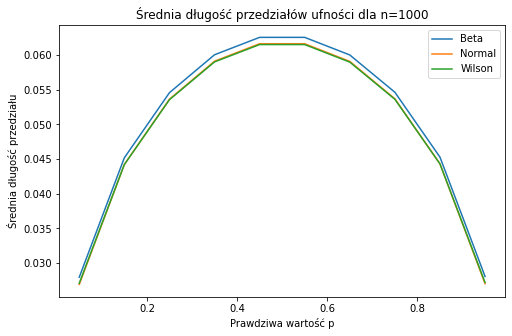

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint

# Parametry symulacji
n_values = [30, 100, 1000]  # Rozmiary próby
p_values = np.linspace(0.05, 0.95, 10)  # Różne wartości p
alpha = 0.05  # Poziom istotności (1 - poziom ufności)
num_simulations = 1000  # Liczba symulacji

# Przechowywanie wyników
coverage_results = {method: {n: [] for n in n_values} for method in ['beta', 'normal', 'wilson']}
length_results = {method: {n: [] for n in n_values} for method in ['beta', 'normal', 'wilson']}

# Symulacja dla każdego n i p
for n in n_values:
    for p in p_values:
        coverage_counts = {method: 0 for method in ['beta', 'normal', 'wilson']}
        lengths = {method: [] for method in ['beta', 'normal', 'wilson']}

        for _ in range(num_simulations):
            successes = np.random.binomial(n, p)

            for method in ['beta', 'normal', 'wilson']:
                ci_lower, ci_upper = proportion_confint(successes, n, alpha=alpha, method=method)
                lengths[method].append(ci_upper - ci_lower)

                # Sprawdzenie, czy prawdziwe p znajduje się w przedziale
                if ci_lower <= p <= ci_upper:
                    coverage_counts[method] += 1

        # Średnia długość przedziału
        for method in ['beta', 'normal', 'wilson']:
            coverage_results[method][n].append(coverage_counts[method] / num_simulations)
            length_results[method][n].append(np.mean(lengths[method]))

# Tworzenie wykresów pokrycia
for n in n_values:
    plt.figure(figsize=(8, 5))
    for method in ['beta', 'normal', 'wilson']:
        plt.plot(p_values, coverage_results[method][n], label=method.capitalize())
    plt.axhline(0.95, color='black', linestyle='--', label='Poziom ufności 95%')
    plt.xlabel('Prawdziwa wartość p')
    plt.ylabel('Prawdopodobieństwo pokrycia')
    plt.title(f'Prawdopodobieństwo pokrycia dla n={n}')
    plt.legend()
    plt.show()

# Tworzenie wykresów długości przedziałów
for n in n_values:
    plt.figure(figsize=(8, 5))
    for method in ['beta', 'normal', 'wilson']:
        plt.plot(p_values, length_results[method][n], label=method.capitalize())
    plt.xlabel('Prawdziwa wartość p')
    plt.ylabel('Średnia długość przedziału')
    plt.title(f'Średnia długość przedziałów ufności dla n={n}')
    plt.legend()
    plt.show()


## Część V

### Zadanie 10

In [39]:
from scipy.stats import binomtest

# parametry
successes = 15
n = 20
p0 = 0.5

# test dwustronny
result_binom = binomtest(successes, n, p=p0, alternative='two-sided')
print("Binomtest (dokładny):")
print("p-value:", result_binom.pvalue)


Binomtest (dokładny):
p-value: 0.04138946533203125


In [40]:
from statsmodels.stats.proportion import proportions_ztest

# z-test dla jednej proporcji
count = successes
nobs = n

stat, pval = proportions_ztest(count, nobs, value=p0, alternative='two-sided')
print("\nZ-test (asymptotyczny):")
print("statystyka z:", stat)
print("p-value:", pval)



Z-test (asymptotyczny):
statystyka z: 2.581988897471611
p-value: 0.009823274507519249


### Zadanie 11

In [43]:
import pandas as pd
from scipy.stats import binomtest
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05  # poziom istotności

### 1. Czy P(plec='kobieta') = 0.5?

n_kobiet = (df['PŁEĆ'] == 'kobieta').sum()
n_osob = df['PŁEĆ'].notna().sum()

test1 = binomtest(n_kobiet, n_osob, p=0.5, alternative='two-sided')
print("Hipoteza 1: P(kobieta) = 0.5")
print("p-value:", test1.pvalue)
print("Wniosek:", "Odrzucamy H0" if test1.pvalue < alpha else "Brak podstaw do odrzucenia H0")
print()

### 2. Czy P(PYT_1='tak') ≥ 0.7?

szkolenia_tak = (df['PYT_1'] == 'tak').sum()
n_szk = df['PYT_1'].notna().sum()

test2 = binomtest(szkolenia_tak, n_szk, p=0.7, alternative='greater')
print("Hipoteza 2: P(PYT_1='tak') ≥ 0.7")
print("p-value:", test2.pvalue)
print("Wniosek:", "Odrzucamy H0" if test2.pvalue < alpha else "Brak podstaw do odrzucenia H0")
print()

### 3. Czy P(kierownicze | kobieta) == P(kierownicze | mężczyzna)

df_k = df[df['PŁEĆ'] == 'kobieta']
df_m = df[df['PŁEĆ'] == 'mężczyzna']

count = [
    (df_k['CZY_KIER'] == 'tak').sum(),
    (df_m['CZY_KIER'] == 'tak').sum()
]
nobs = [df_k['CZY_KIER'].notna().sum(), df_m['CZY_KIER'].notna().sum()]

stat3, pval3 = proportions_ztest(count, nobs)
print("Hipoteza 3: P(kierownicze | kobieta) = P(kierownicze | mężczyzna)")
print("p-value:", pval3)
print("Wniosek:", "Odrzucamy H0" if pval3 < alpha else "Brak podstaw do odrzucenia H0")
print()

### 4. Czy P(PYT_1='tak' | kobieta) = P(PYT_1='tak' | mężczyzna)

count = [
    (df_k['PYT_1'] == 'tak').sum(),
    (df_m['PYT_1'] == 'tak').sum()
]
nobs = [df_k['PYT_1'].notna().sum(), df_m['PYT_1'].notna().sum()]

stat4, pval4 = proportions_ztest(count, nobs)
print("Hipoteza 4: P(PYT_1='tak' | kobieta) = P(PYT_1='tak' | mężczyzna)")
print("p-value:", pval4)
print("Wniosek:", "Odrzucamy H0" if pval4 < alpha else "Brak podstaw do odrzucenia H0")
print()
# Hipoteza 5: P(ZL | kobieta) ≥ P(ZL | mężczyzna)
# Używamy testu jednostronnego: H0: p1 - p2 = 0, H1: p1 - p2 > 0

count = [
    (df_k['DZIAŁ'] == 'HR').sum(),
    (df_m['DZIAŁ'] == 'HR').sum()
]
nobs = [df_k['DZIAŁ'].notna().sum(), df_m['DZIAŁ'].notna().sum()]

stat5, pval5 = proportions_ztest(count, nobs, alternative='larger')
print("Hipoteza 5: P(HR | kobieta) ≥ P(HR | mężczyzna)")
print("p-value:", pval5)
print("Wniosek:", "Odrzucamy H0" if pval5 < alpha else "Brak podstaw do odrzucenia H0")

Hipoteza 1: P(kobieta) = 0.5
p-value: 1.2446030555722283e-60
Wniosek: Odrzucamy H0

Hipoteza 2: P(PYT_1='tak') ≥ 0.7
p-value: 1.0
Wniosek: Brak podstaw do odrzucenia H0

Hipoteza 3: P(kierownicze | kobieta) = P(kierownicze | mężczyzna)
p-value: nan
Wniosek: Brak podstaw do odrzucenia H0

Hipoteza 4: P(PYT_1='tak' | kobieta) = P(PYT_1='tak' | mężczyzna)
p-value: nan
Wniosek: Brak podstaw do odrzucenia H0

Hipoteza 5: P(HR | kobieta) ≥ P(HR | mężczyzna)
p-value: nan
Wniosek: Brak podstaw do odrzucenia H0


### Zadanie 12

C:\Users\YOGA\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:790: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std


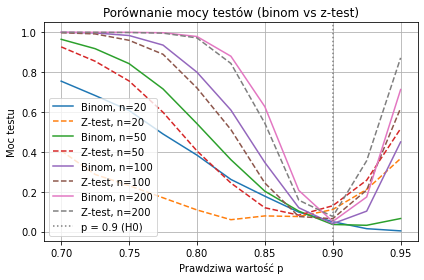

In [44]:
import numpy as np
from scipy.stats import binomtest
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

# Parametry testu
alpha = 0.05
p0 = 0.9  # hipoteza zerowa

# Alternatywne wartości p (prawdziwe wartości w populacji)
p_alt_values = np.linspace(0.7, 0.95, 11)

# Różne rozmiary próby
n_values = [20, 50, 100, 200]

# Liczba powtórzeń symulacji
simulations = 1000

# Wyniki mocy
power_binom = {}
power_ztest = {}

for n in n_values:
    power_binom[n] = []
    power_ztest[n] = []
    
    for p_alt in p_alt_values:
        rejections_binom = 0
        rejections_ztest = 0
        
        for _ in range(simulations):
            sample = np.random.binomial(1, p_alt, size=n)
            successes = sample.sum()

            # Dokładny test dwumianowy
            p_binom = binomtest(successes, n, p=p0, alternative='two-sided').pvalue
            if p_binom < alpha:
                rejections_binom += 1

            # Test z-score
            stat, p_z = proportions_ztest(count=successes, nobs=n, value=p0, alternative='two-sided')
            if p_z < alpha:
                rejections_ztest += 1

        power_binom[n].append(rejections_binom / simulations)
        power_ztest[n].append(rejections_ztest / simulations)

# Wykresy mocy
for n in n_values:
    plt.plot(p_alt_values, power_binom[n], label=f"Binom, n={n}", linestyle='-')
    plt.plot(p_alt_values, power_ztest[n], label=f"Z-test, n={n}", linestyle='--')

plt.axvline(p0, color='gray', linestyle=':', label="p = 0.9 (H0)")
plt.xlabel("Prawdziwa wartość p")
plt.ylabel("Moc testu")
plt.title("Porównanie mocy testów (binom vs z-test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
